In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

data=pd.read_csv("creditcard.csv")
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [2]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [2]:
X=data.drop(columns='Class')
y=data["Class"]
X

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.251412 -0.018307   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.524980  0.247998   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300   
4       0.095921  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.475829  0.213454   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.059616  0.214205   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.001396  0.232045   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.127434  0.265245   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 30 columns]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [5]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.9991594582229457


In [6]:
def print_tree(clf):
    plt.figure(figsize=(100, 35))
    tree.plot_tree(clf,feature_names=list(X),
               filled=True);

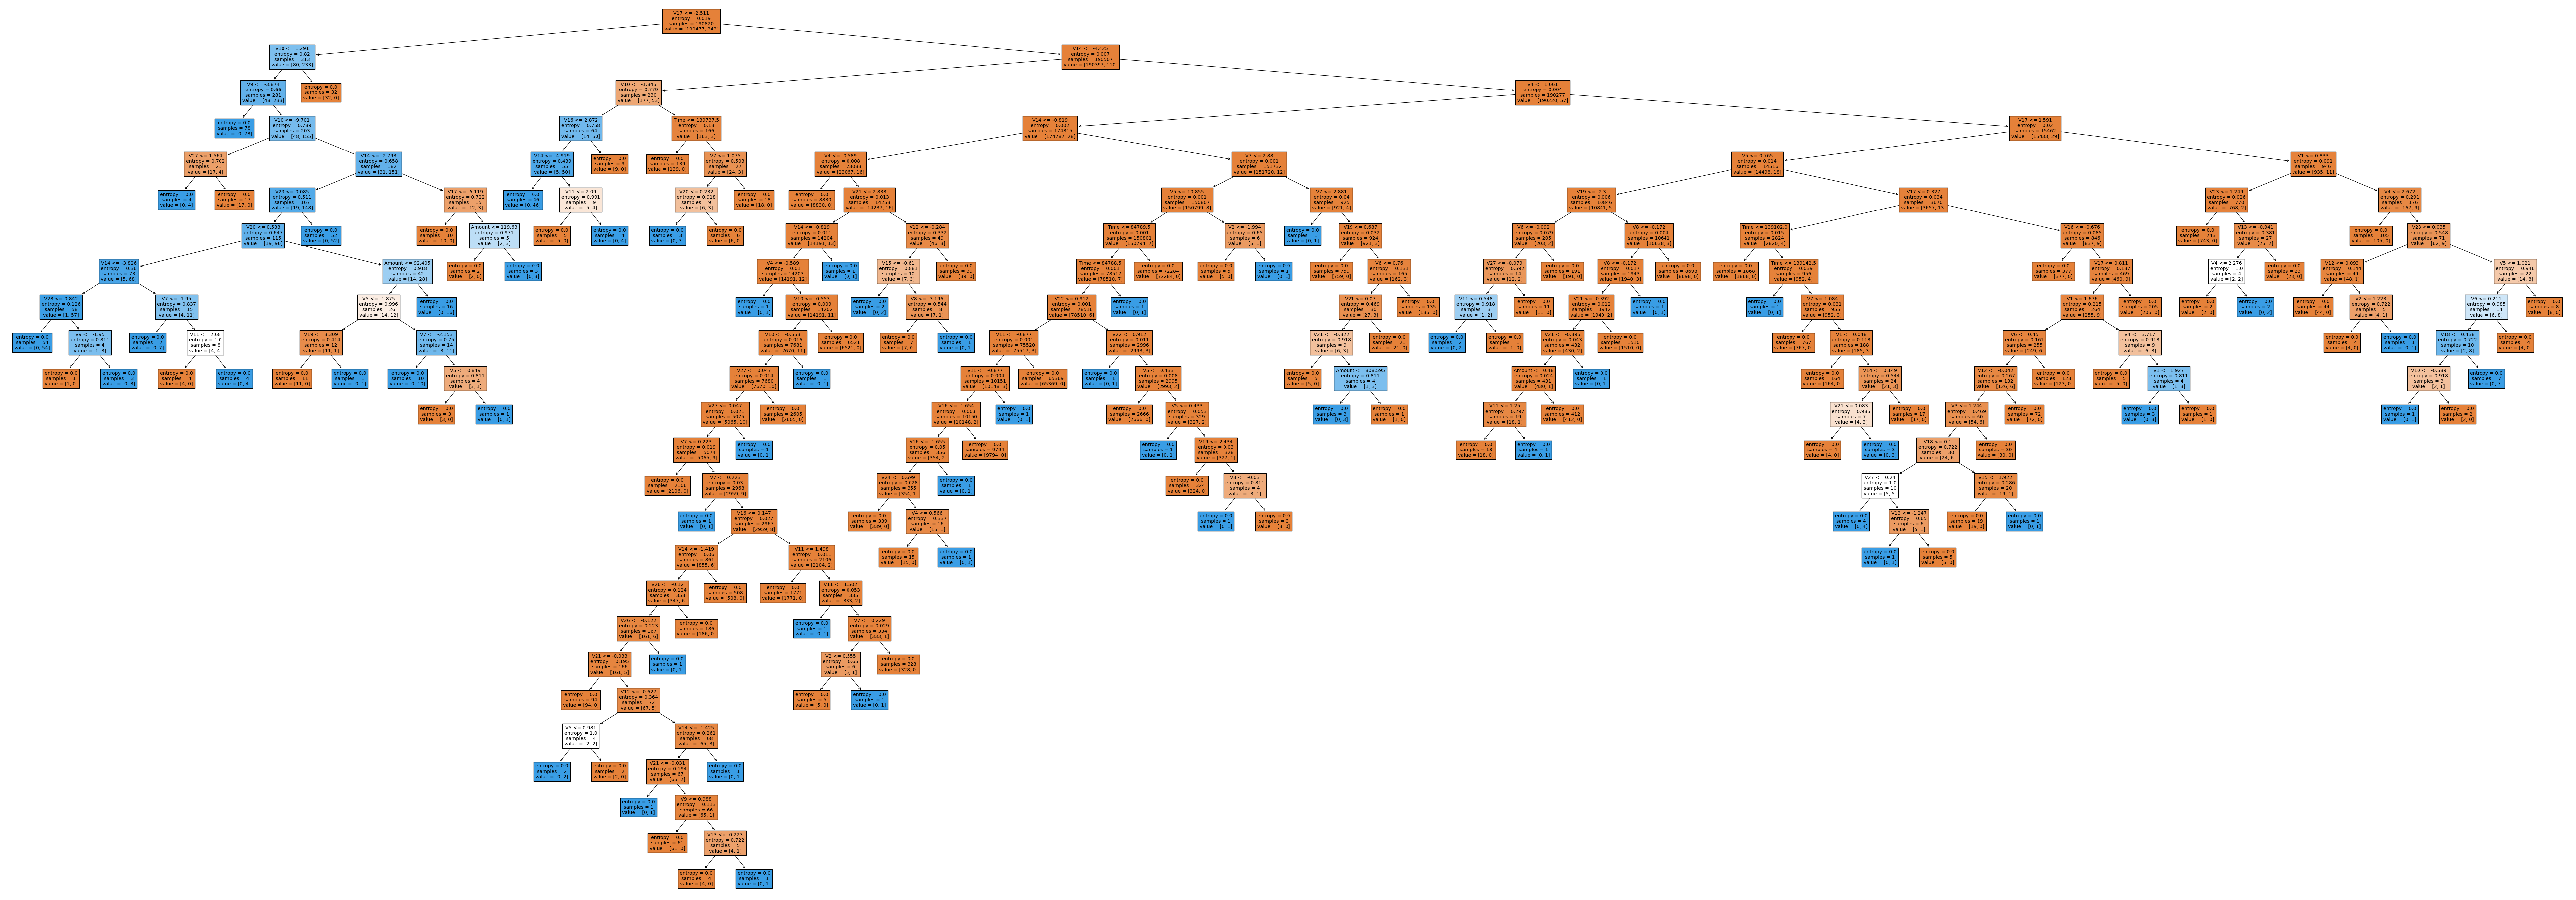

In [11]:
print_tree(clf)

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
X_train.shape

(190820, 30)

In [9]:
param_dist = {
    'min_samples_leaf':range(100,900,30),
    'max_depth': range(3,30,2),
    'min_samples_split':range(500,1000,25)
}

In [14]:
grid=RandomizedSearchCV(clf,param_distributions=param_dist,n_iter=100,cv=3)

In [15]:
X_train_temp,X_test_temp,y_train_temp,y_test_temp=train_test_split(X,y,test_size=0.80,random_state=42)

In [16]:
X_train_temp.shape

(56961, 30)

In [17]:
y_train_temp[y_train_temp==1]

152295    1
27749     1
151807    1
74496     1
46998     1
         ..
42674     1
33276     1
182992    1
154697    1
226814    1
Name: Class, Length: 105, dtype: int64

In [18]:
grid.fit(X_train_temp,y_train_temp)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=100,
                   param_distributions={'max_depth': range(3, 30, 2),
                                        'min_samples_leaf': range(100, 900, 30),
                                        'min_samples_split': range(500, 1000, 25)})

In [20]:
grid.best_params_

{'min_samples_split': 500, 'min_samples_leaf': 520, 'max_depth': 29}

In [21]:
best_clf=grid.best_estimator_

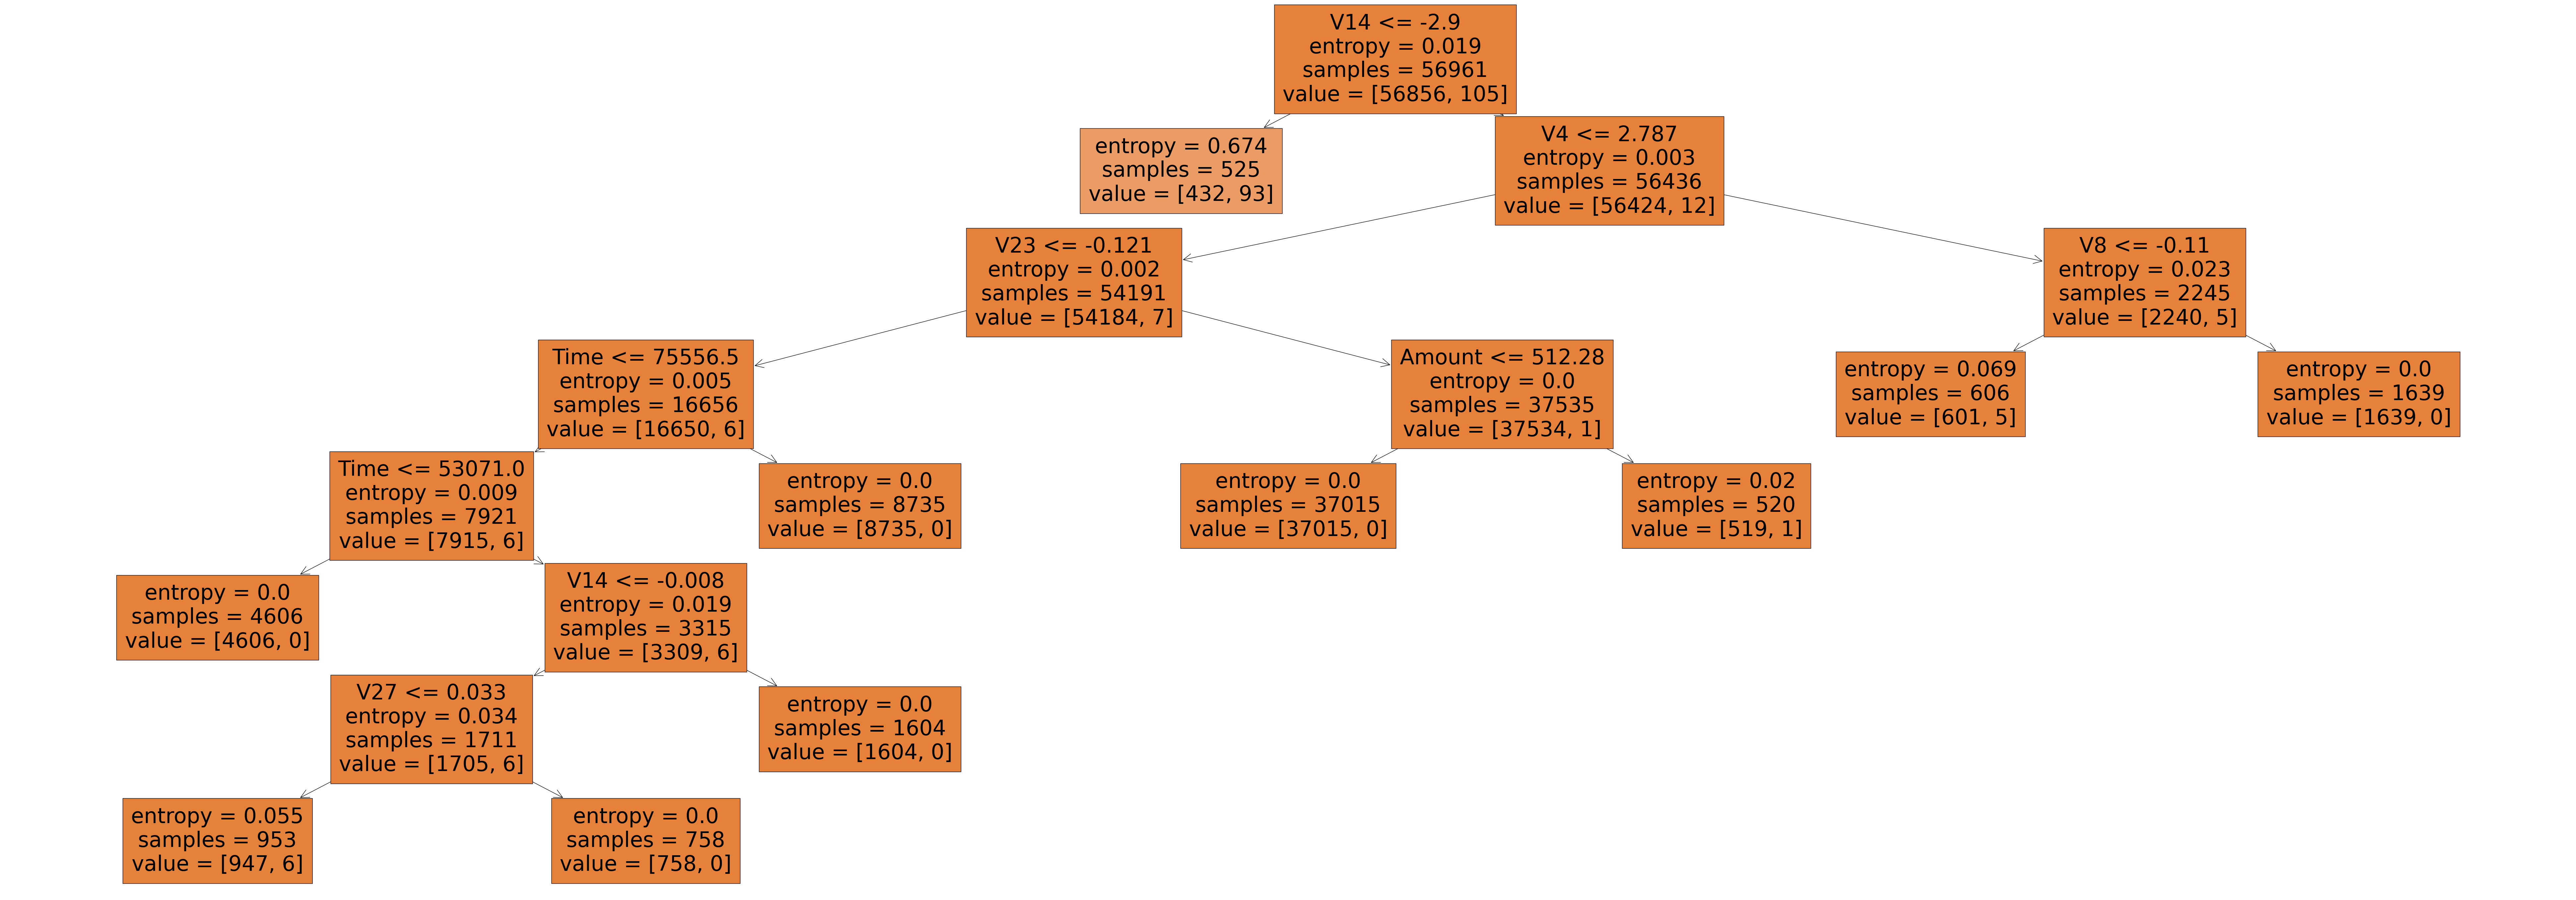

In [22]:
print_tree(best_clf)

In [23]:
best_clf.score(X_train_temp,y_train_temp)

0.9981566334860694

In [24]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=520,
                       min_samples_split=500)

In [25]:
best_clf.score(X_train,y_train)

0.9982024944974321

In [26]:
best_clf.score(X_test,y_test)

0.9984146743698596

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,clf.predict(X_test),target_names=["Not Fraud","Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93838
       Fraud       0.72      0.77      0.74       149

    accuracy                           1.00     93987
   macro avg       0.86      0.88      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
y_test

In [31]:
print(y_test.shape)
print(X_test.shape)

(93987,)
(93987, 30)


In [10]:
def print_confusion_matrix(clf,y_true,X_true):
    cm=confusion_matrix(y_true,clf.predict(X_true))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud","Fraud"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

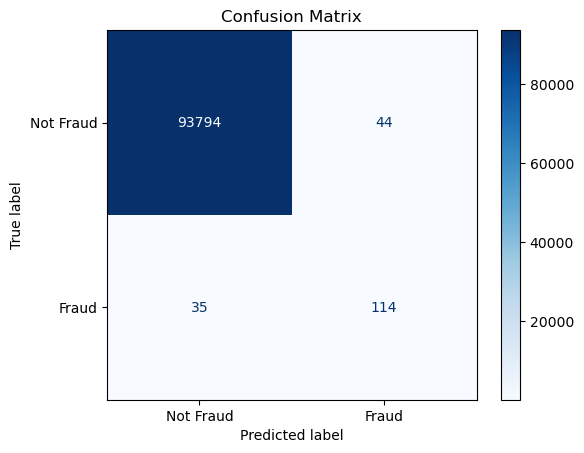

In [37]:
print_confusion_matrix(clf,y_test,X_test)

In [14]:
fraud=data[data.Class==1]
not_fraud=data[data.Class==0]
fraud.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

In [16]:
fraud.Class.value_counts(),not_fraud.Class.value_counts()

(Class
 1    492
 Name: count, dtype: int64,
 Class
 0    284315
 Name: count, dtype: int64)

In [17]:
balanced_df=pd.concat([fraud,not_fraud.sample(len(fraud),random_state=42)])

In [19]:
balanced_df.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

In [21]:
balanced_df["Class"].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [24]:
balanced_df=balanced_df.sample(frac=1,random_state=42)
balanced_df

Time        V1        V2        V3        V4        V5        V6  \
255545  157278.0  1.984787 -1.937036  0.486613 -1.245536 -2.518536 -0.544524   
248296  153875.0 -0.613696  3.698772 -5.534941  5.620486  1.649263 -2.335145   
76163    56424.0  0.319007 -1.072867 -0.216146  1.494709 -0.627063 -0.761867   
239501  150139.0 -6.682832 -2.714268 -5.774530  1.449792 -0.661836 -1.148650   
143336   85285.0 -6.713407  3.921104 -9.746678  5.148263 -5.151563 -2.099389   
...          ...       ...       ...       ...       ...       ...       ...   
41395    40662.0 -4.446847 -0.014793 -5.126307  6.945130  5.269255 -4.297177   
142557   84789.0 -1.430864 -0.802529  1.123320  0.389760 -0.281214 -0.055123   
271842  164776.0  1.947737  0.009899 -1.244776  1.302383  0.040133 -1.067379   
239499  150138.0 -2.150855  2.187917 -3.430516  0.119476 -0.173210  0.290700   
33276    37167.0 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

              V7        V8        V9  ...       V21       V22       V23  \
255545 -1.819244 -0.074875 -0.659777  ...  0.174011  0.889289  0.218248   
248296 -0.907188  0.706362 -3.747646  ...  0.319261 -0.471379 -0.075890   
76163   0.941687 -0.430272 -0.267431  ...  0.332521 -0.022461 -0.537691   
239501  0.849686  0.433427 -1.315646  ...  0.220526  1.187013  0.335821   
143336 -5.937767  3.578780 -4.684952  ...  0.954272 -0.451086  0.127214   
...          ...       ...       ...  ...       ...       ...       ...   
41395  -2.591242  0.342671 -3.880663  ...  0.247913 -0.049586 -0.226017   
142557  1.326232  0.195700 -0.546890  ...  0.325575  0.014002  0.844946   
271842  0.301814 -0.311473  0.330881  ...  0.279370  0.832769 -0.026910   
239499 -2.808988 -2.679351 -0.556685  ... -0.073205  0.561496 -0.075034   
33276  -5.283435  0.131619  0.658176  ... -0.734308 -0.599926 -4.908301   

             V24       V25       V26       V27       V28  Amount  Class  
255545  0.492384 -0.584599 -0.135040  0.070319 -0.000205  120.00      0  
248296 -0.667909 -0.642848  0.070600  0.488410  0.292345    0.00      1  
76163   0.452072  0.555495 -0.383543 -0.068520  0.106578  484.00      0  
239501  0.215683  0.803110  0.044033 -0.054988  0.082337  237.26      1  
143336 -0.339450  0.394096  1.075295  1.649906 -0.394905  252.92      1  
...          ...       ...       ...       ...       ...     ...    ...  
41395  -0.401236  0.856124  0.661272  0.492560  0.971834    1.00      1  
142557  0.114963  0.156365 -0.619437 -0.120351  0.035594  354.33      1  
271842 -0.020475  0.268850 -0.425449 -0.005599 -0.046730   42.80      0  
239499 -0.437619  0.353841 -0.521339  0.144465  0.026588   50.00      1  
33276   0.410170 -1.167660  0.520508  1.937421 -1.552593   12.31      1  

[984 rows x 31 columns]

In [30]:
X_b=balanced_df.drop(columns="Class").to_numpy()
y_b=balanced_df["Class"].to_numpy()
X_b

array([[ 1.57278000e+05,  1.98478750e+00, -1.93703612e+00, ...,
         7.03189571e-02, -2.05020146e-04,  1.20000000e+02],
       [ 1.53875000e+05, -6.13695895e-01,  3.69877241e+00, ...,
         4.88409528e-01,  2.92344974e-01,  0.00000000e+00],
       [ 5.64240000e+04,  3.19006821e-01, -1.07286701e+00, ...,
        -6.85200301e-02,  1.06578220e-01,  4.84000000e+02],
       ...,
       [ 1.64776000e+05,  1.94773700e+00,  9.89856049e-03, ...,
        -5.59855001e-03, -4.67302113e-02,  4.28000000e+01],
       [ 1.50138000e+05, -2.15085504e+00,  2.18791663e+00, ...,
         1.44464860e-01,  2.65881155e-02,  5.00000000e+01],
       [ 3.71670000e+04, -7.92389070e+00, -5.19836020e+00, ...,
         1.93742140e+00, -1.55259284e+00,  1.23100000e+01]])

In [35]:
X_b_train,X_b_test,X_b_val=X_b[:700],X_b[700:842],X_b[842:]
y_b_train,y_b_test,y_b_val=y_b[:700],y_b[700:842],y_b[842:]

In [36]:
X_b_train.shape,X_b_test.shape,X_b_val.shape,y_b_train.shape,y_b_test.shape,y_b_val.shape

((700, 30), (142, 30), (142, 30), (700,), (142,), (142,))

In [43]:
clf_b=tree.DecisionTreeClassifier(criterion='entropy')

In [44]:
param_dist = {
    'min_samples_leaf':range(20,100,15),
    'max_depth': range(3,20,2),
    'min_samples_split':range(20,50,10)
}

In [49]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_b=GridSearchCV(clf,param_dist,cv=4)

In [53]:
grid_b.fit(X_b_train,y_b_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(3, 20, 2),
                         'min_samples_leaf': range(20, 100, 15),
                         'min_samples_split': range(20, 50, 10)})

In [54]:
grid_b.best_params_

{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 30}

In [55]:
clf_b=grid_b.best_estimator_

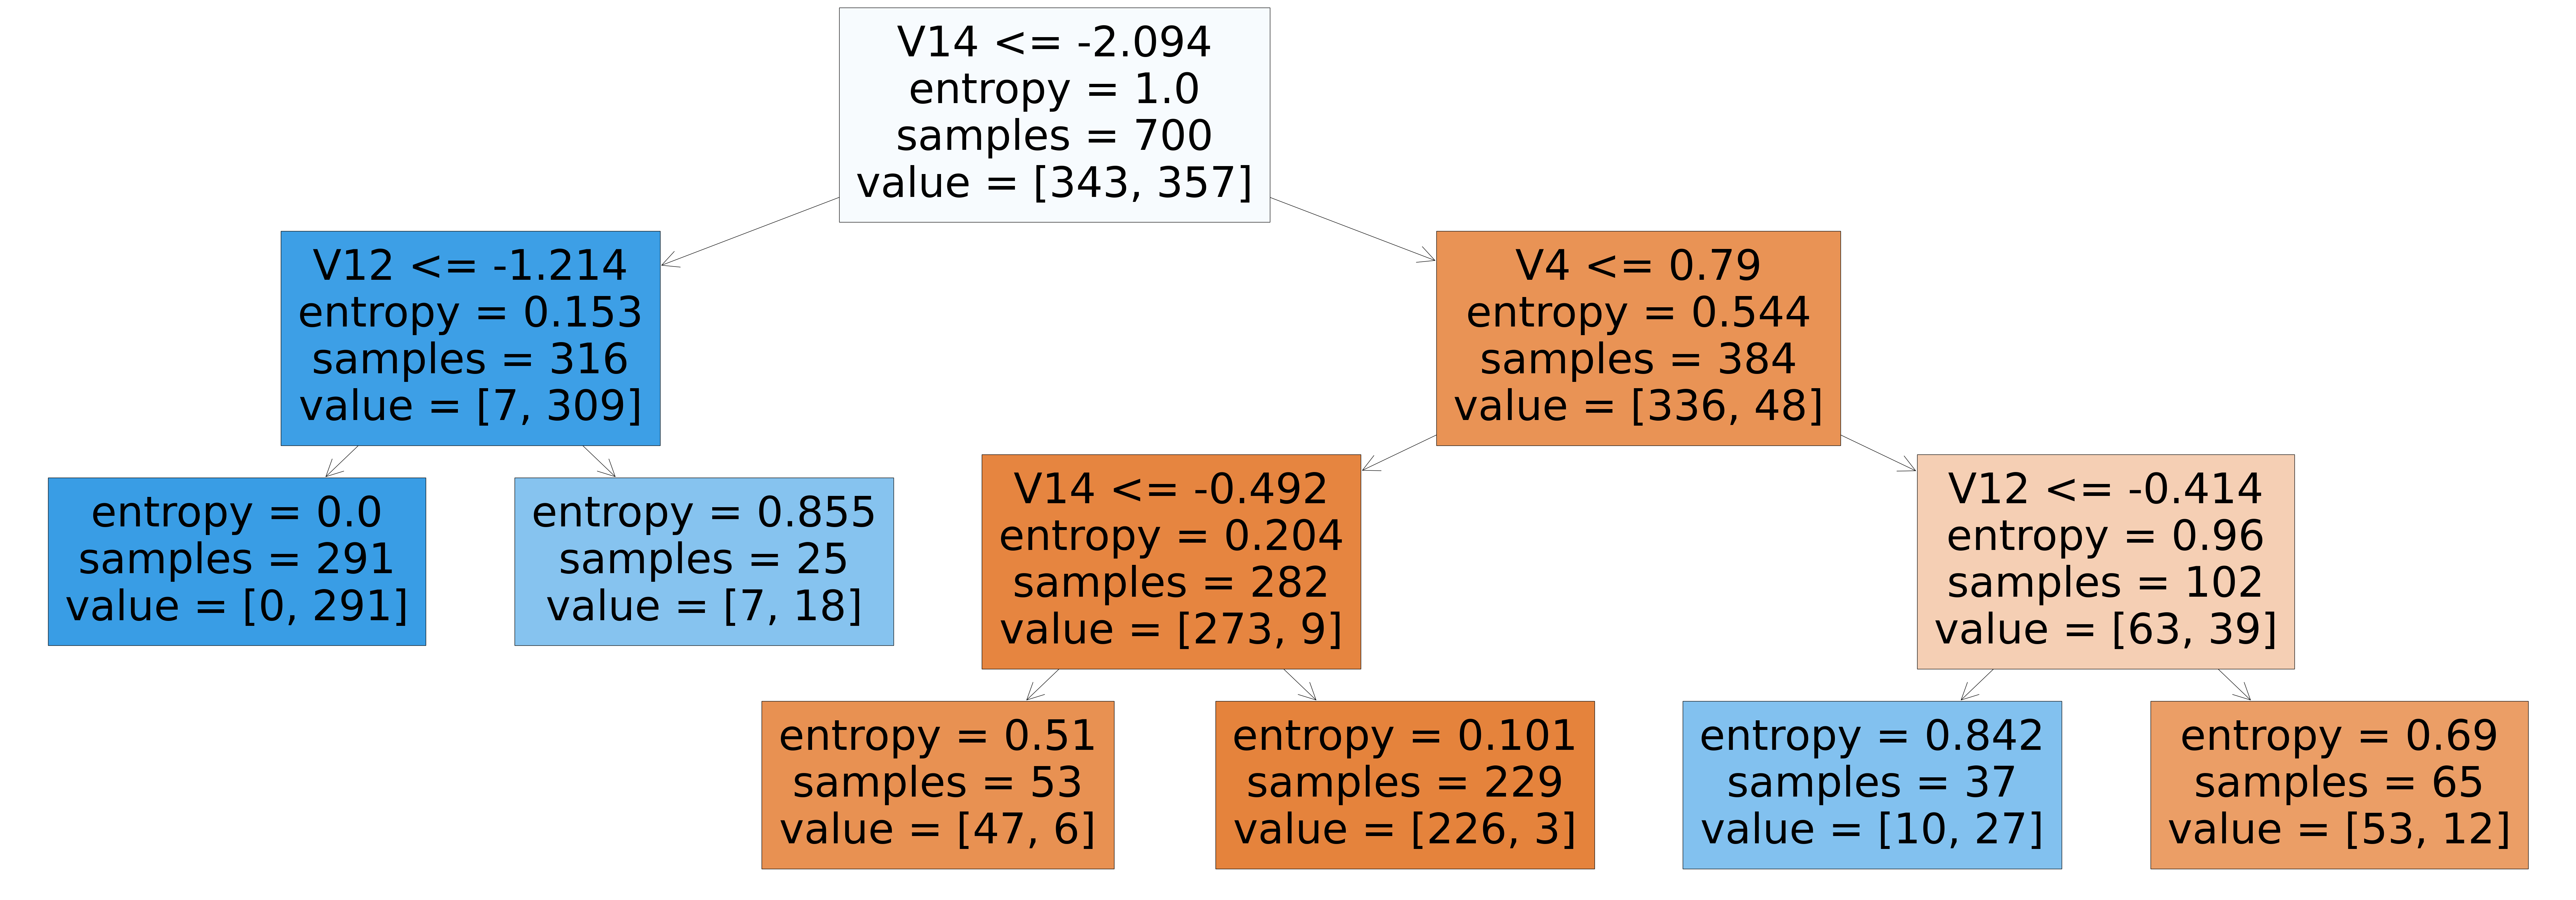

In [56]:
print_tree(clf_b)

In [57]:
clf_b.score(X_b_train,y_b_train)

0.9457142857142857

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_b_val,clf_b.predict(X_b_val),target_names=["Not Fraud","Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.90      0.89        63
       Fraud       0.92      0.90      0.91        79

    accuracy                           0.90       142
   macro avg       0.90      0.90      0.90       142
weighted avg       0.90      0.90      0.90       142



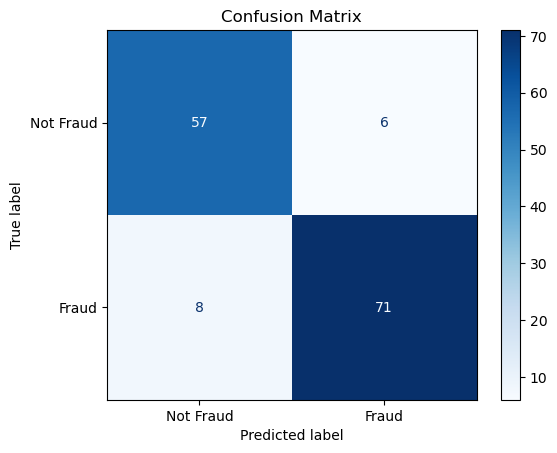

In [60]:
print_confusion_matrix(clf_b,y_b_val,X_b_val)

In [63]:
y_test_np=y_test.to_numpy()
X_test_np=X_test.to_numpy()

In [66]:
print(classification_report(y_b_test,clf_b.predict(X_b_test),target_names=["Not Fraud","Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.92      0.93        86
       Fraud       0.88      0.91      0.89        56

    accuracy                           0.92       142
   macro avg       0.91      0.91      0.91       142
weighted avg       0.92      0.92      0.92       142

